In [1]:
import numpy as np


# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

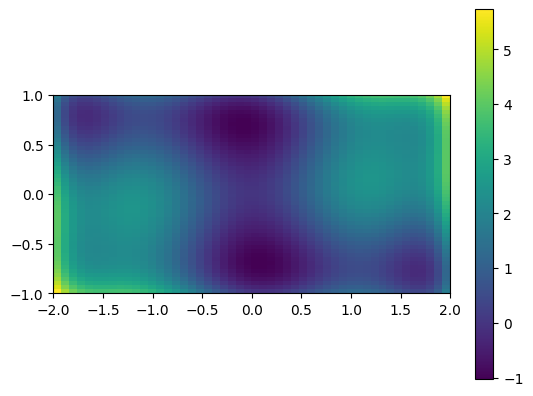

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.031628453489861
        x: [ 8.984e-02 -7.127e-01]
      nit: 6
      jac: [-4.321e-07 -5.960e-08]
 hess_inv: [[ 1.321e-01 -7.847e-03]
            [-7.847e-03  6.152e-02]]
     nfev: 27
     njev: 9
[ 0.08984195 -0.71265641]


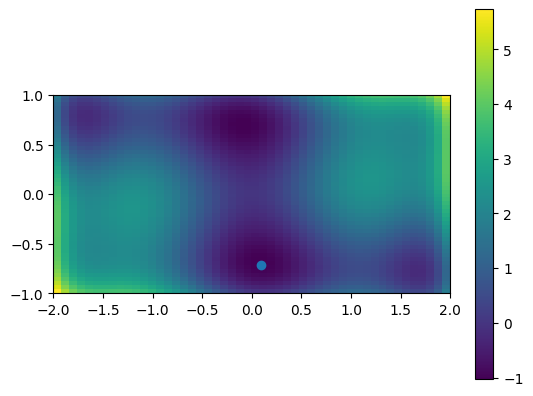

In [3]:
from scipy import optimize

x_min = optimize.minimize(sixhump, x0=[0.175, -0.8])
print(x_min)
plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
print(x_min.x)
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

Text(0.5, 0.92, 'Six-hump Camelback function')

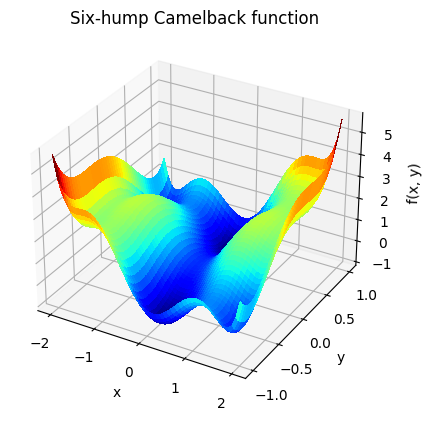

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

In [5]:
import numpy as np
from scipy.optimize import minimize

In [6]:
def f(x, A, x0, y0, sigma_x, sigma_y):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    return A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))

FOV_range = 10
scale_resolution = .1
x = np.arange(-FOV_range, FOV_range, scale_resolution)
y = np.arange(-FOV_range, FOV_range, scale_resolution)
x0 = 1.0
y0 = 0
sigx = 1
sigy = 1
A = (1. / (2 * np.pi*sigx*sigy))
Xg, Yg = np.meshgrid(x, y)
Z = f([Xg, Yg], A, x0, y0, sigx, sigy)


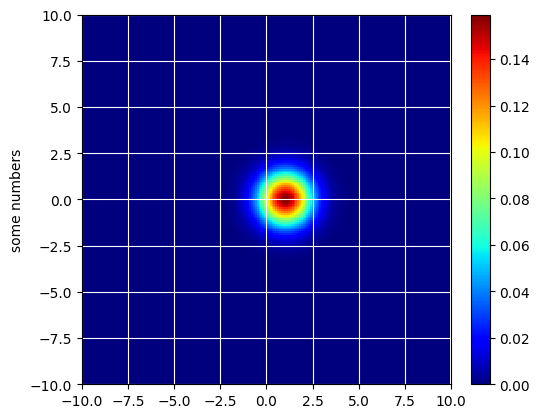

In [7]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig = figure()
ax = fig.add_subplot(1,1,1)
box = (x.min(), x.max(), y.min(), y.max())          # left, right, bottom, top
im = ax.imshow(Z, interpolation="none", origin='lower', extent=box, cmap='jet') #, vmin = 0, vmax = 0.15
# im = ax.imshow(Z, interpolation="none", origin='lower', cmap='jet')
# ax.contour(Xg, Yg, Z, levels=[A/np.e**0.5], colors="k", extent=box)
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# ax.scatter(x0, y0)
ax.grid(color='w')
# plt.plot(wp_X, wp_Y, 'x-', color='orange')
plt.ylabel('some numbers')
plt.axis([-FOV_range, FOV_range, -FOV_range, FOV_range])
plt.show()

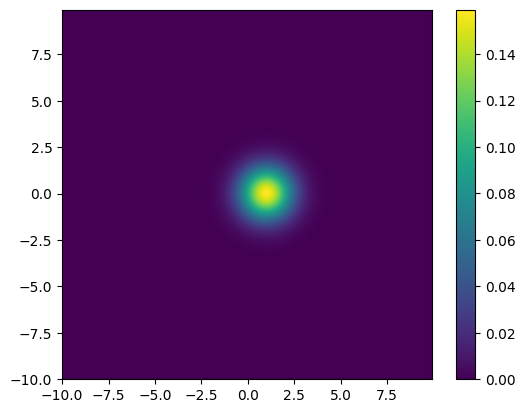

In [8]:
plt.figure()
box = (x.min(), x.max(), y.min(), y.max())   # left, right, bottom, top
# plt.imshow(Z, interpolation="none", origin='lower', extent=box, cmap='jet')
plt.imshow(Z, extent=box, origin="lower")
plt.colorbar()

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.079850348624873e-06
        x: [ 1.000e+00  4.879e+00]
      nit: 13
      jac: [-1.279e-13 -5.268e-06]
 hess_inv: [[ 1.000e+00  1.401e-04]
            [ 1.401e-04  1.443e+04]]
     nfev: 45
     njev: 15
[1.00000004 4.87869061]


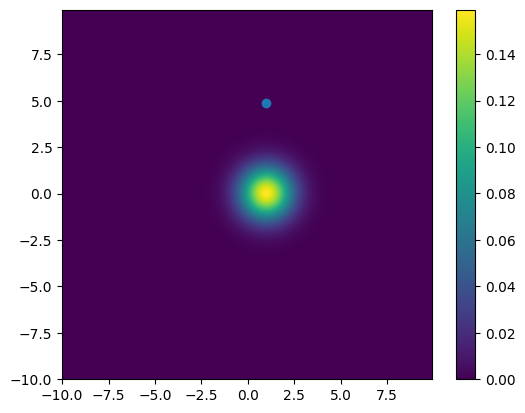

In [9]:
from scipy import optimize

x_min = optimize.minimize(f, [1, 1], args=(A, x0, y0, sigx, sigy))
print(x_min)
plt.figure()
# Show the function in 2D
plt.imshow(Z, extent=box, origin="lower")
plt.colorbar()
# And the minimum that we've found:
print(x_min.x)
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

In [10]:
def f_d(x, A, x0, y0, sigma_x, sigma_y, cp):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    res = A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))
    return res
    # if res >= 0.01:
    #     return res + FOV_range**2
    # else:
    #     return res + np.sqrt((cp[0]-x[0])**2 + (cp[1]-x[1])**2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.152212192005643e-06
        x: [-4.974e-01 -4.492e+00]
      nit: 9
      jac: [ 3.223e-06  9.668e-06]
 hess_inv: [[ 7.732e+02  2.317e+03]
            [ 2.317e+03  6.951e+03]]
     nfev: 36
     njev: 12
[-0.4974069  -4.49222073]


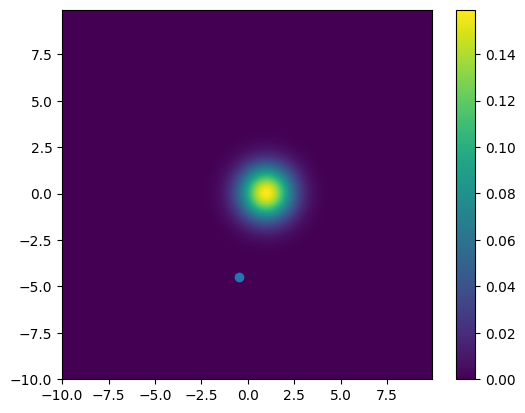

In [11]:
from scipy.optimize import NonlinearConstraint

C3 = NonlinearConstraint(lambda x : np.linalg.norm(x), 0, np.inf)


import scipy.optimize as opt
# X_0 = np.array([0, -5, 0, -4, 0, -3, 0, -2, 0, -1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5])
X_0 = np.array([0, -3])
# sol = opt.minimize(f, X_0, args=(A, x0, y0, sigx, sigy, X_0), constraints=(C3,))
# sol = opt.minimize(f_d, X_0, args=(A, x0, y0, sigx, sigy, X_0), method='SLSQP', 
# bounds=[(-np.inf, np.inf) for i in range(len(X_0))])
sol = opt.minimize(f_d, X_0, args=(A, x0, y0, sigx, sigy, X_0))
# sol = opt.minimize(f, [1, 1], args=(A, x0, y0, sigx, sigy))
print(sol)
# Show the function in 2D
plt.imshow(Z, extent=box, origin="lower")
plt.colorbar()
# And the minimum that we've found:
print(sol.x)
for i in range(0, len(sol.x), 2):
    plt.scatter(sol.x[i], sol.x[i+1])
# plt.scatter(sol.x[0], sol.x[1])
# plt.scatter(sol.x[2], sol.x[3])
plt.show()

In [12]:
print(f(sol.x, A, x0, y0, sigx, sigy))

2.152212192005643e-06


In [13]:
import numpy as np

def f(x, A, x0, y0, sigma_x, sigma_y):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    return A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))

FOV_range = 10
scale_resolution = .1
x = np.arange(-FOV_range, FOV_range, scale_resolution)
y = np.arange(-FOV_range, FOV_range, scale_resolution)
x0 = 1.0
y0 = 0
sigx = 1
sigy = 1
A = (1. / (2 * np.pi*sigx*sigy))
Xg, Yg = np.meshgrid(x, y)
Z = f([Xg, Yg], A, x0, y0, sigx, sigy)

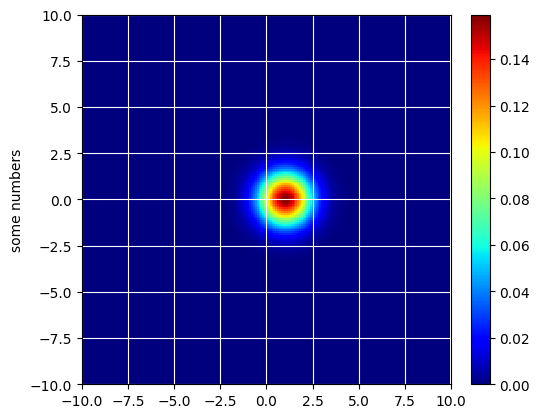

In [14]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig = figure()
ax = fig.add_subplot(1,1,1)
box = (x.min(), x.max(), y.min(), y.max())          # left, right, bottom, top
im = ax.imshow(Z, interpolation="none", origin='lower', extent=box, cmap='jet') #, vmin = 0, vmax = 0.15
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.grid(color='w')
plt.ylabel('some numbers')
plt.axis([-FOV_range, FOV_range, -FOV_range, FOV_range])
plt.show()

In [15]:
def f_obj(x, A, x0, y0, sigma_x, sigma_y, cp):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    res = A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))
    return res

In [16]:
def window_cp(x, y, vx, vy, mask_size):
    output = []
    #X_0 = np.array([0, -6, 0, -5, 0, -4, 0, -3, 0, -2, 0, -1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6])
    for i in range(0, mask_size, 1):
        output.append(x+(i*vx))
        output.append(y+(i*vy))
    return output

In [17]:
def opt_cp(x, y, vx, vy, mask_size, A, x0, y0, sigx, sigy):
    # X_0 = window_cp(x, y, vx, vy, mask_size)
    print(X_0)
    sol = opt.minimize(f_obj, X_0, args=(A, x0, y0, sigx, sigy, X_0))
    print(sol.x)
    return sol

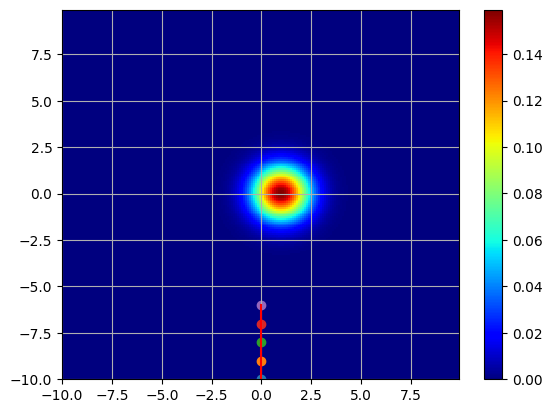

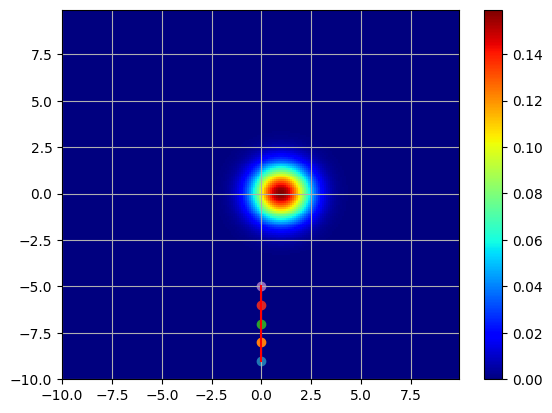

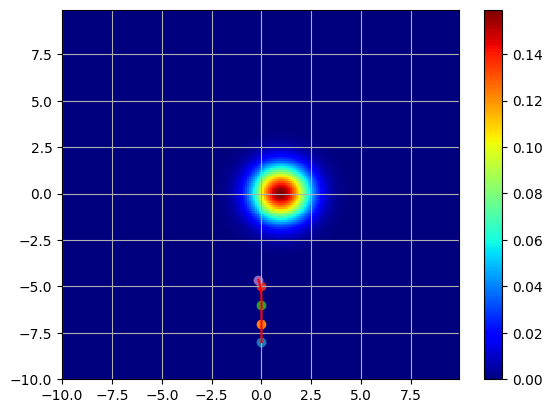

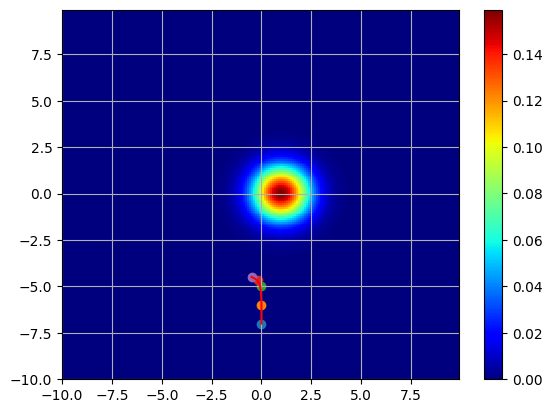

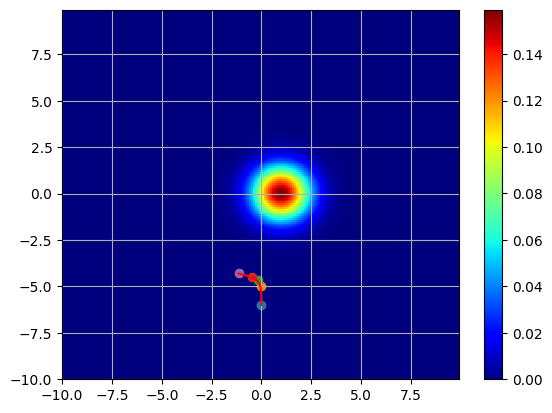

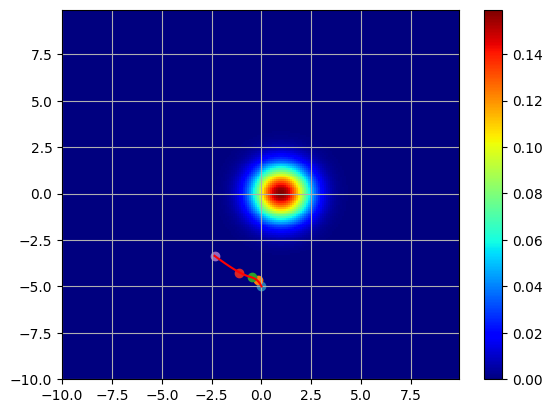

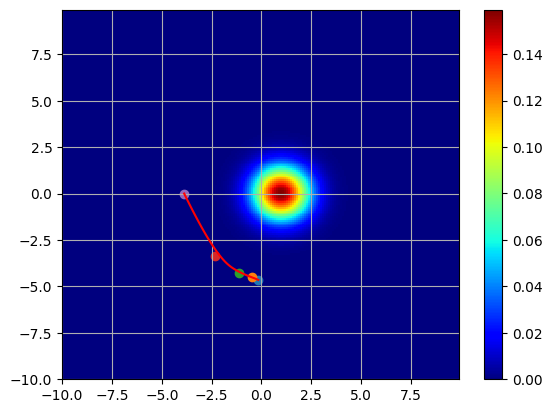

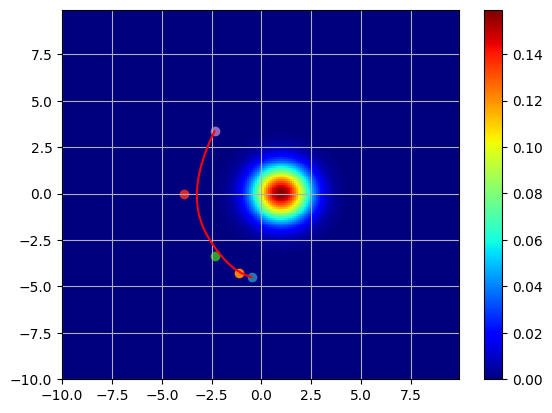

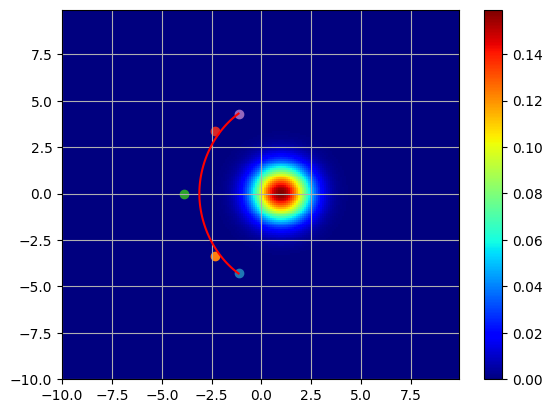

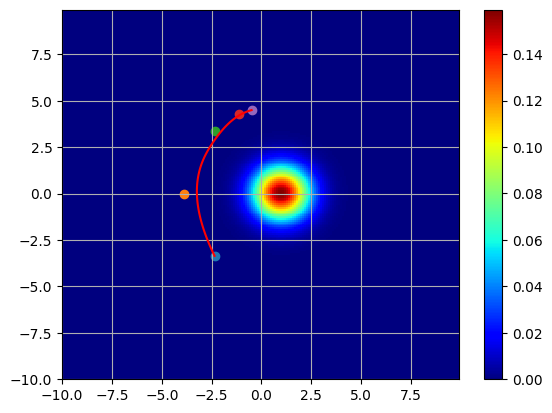

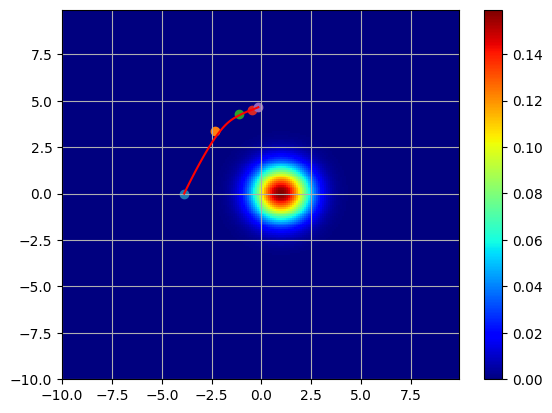

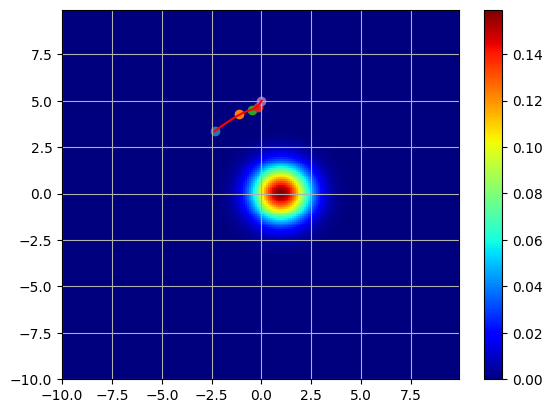

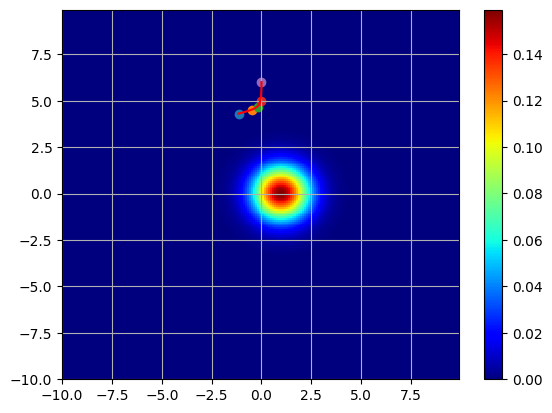

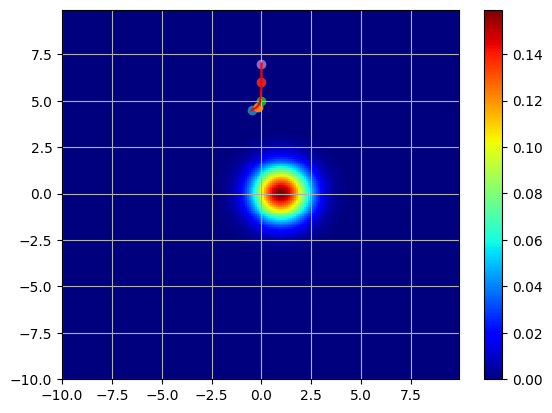

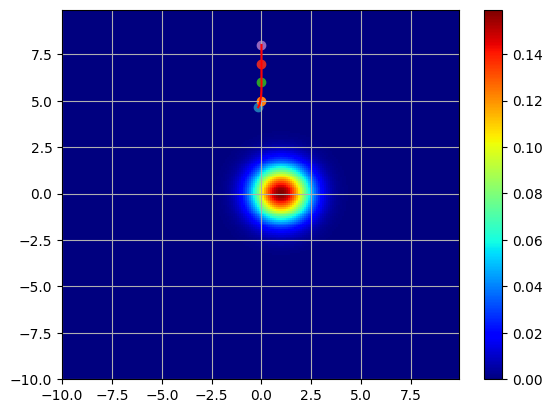

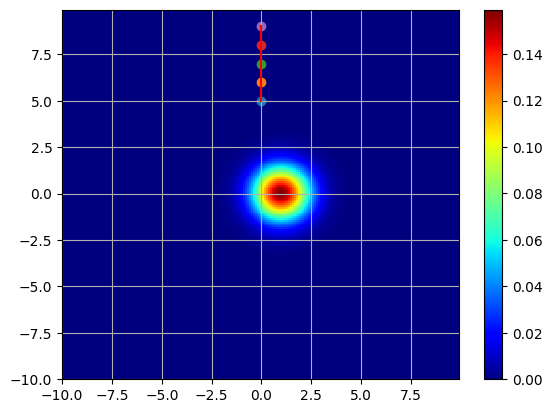

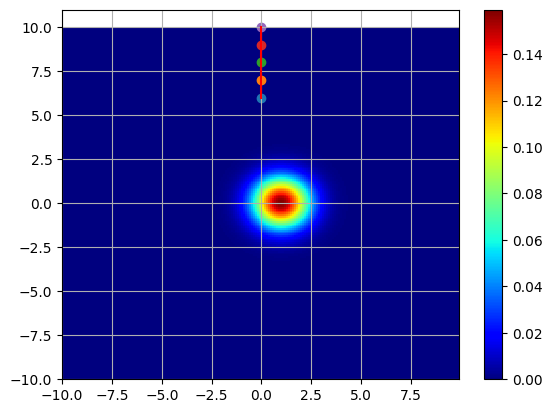

In [18]:
from scipy.optimize import NonlinearConstraint
import scipy.optimize as opt
from scipy.interpolate import BSpline
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from geomdl import BSpline
from geomdl import utilities
from geomdl.visualization import VisMPL

mask_size = 5
sx = 0
sy = -10
vx = 0
vy = 1

for i in range(0, 2*FOV_range-int(mask_size*vy)+2, 1):
# for i in range(0, 2*FOV_range, 1):
    cp = []

    X_0 = window_cp(x=sx, y=sy+i, vx=vx, vy=vy, mask_size= mask_size)
    # print(X_0)
    # sol = opt.minimize(f_obj, X_0, args=(A, x0, y0, sigx, sigy, X_0))

    for i in range(0, len(X_0), 2):
        X0 = np.array([X_0[i], X_0[i+1]])
        # print("input", X0)
        # print(X0)
        sol = opt.minimize(f_d, X0, args=(A, x0, y0, sigx, sigy, X0))
        plt.scatter(sol.x[0], sol.x[1])
        # print("output", sol.x)
        cp.append([sol.x[0], sol.x[1]])

    # sol = opt_cp(sx, sy+i, vx, vy, mask_size, A, x0, y0, sigx, sigy)
    plt.imshow(Z, interpolation="none", extent=box, origin="lower", cmap='jet', aspect='auto')
    plt.colorbar()
    # print(sol.x)
    # for i in range(0, len(sol.x), 2):
    #     plt.scatter(sol.x[i], sol.x[i+1])
    #     cp.append([sol.x[i], sol.x[i+1]])
    # Create a B-Spline curve
    curve = BSpline.Curve()

    # Set up the curve
    curve.degree = 3
    # print(cp)
    curve.ctrlpts = cp

    # Auto-generate knot vector
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    # Set evaluation delta
    curve.delta = 0.01
    curvepts = np.array(curve.evalpts)
    curveplt, = plt.plot(curvepts[:, 0], curvepts[:, 1], color='red', linestyle='-') 
    plt.grid(True)
    # plt.legend(loc='best')
    plt.show()

input [  0 -10]
output [  0. -10.]
input [ 0 -9]
output [ 0. -9.]
input [ 0 -8]
output [ 0. -8.]
input [ 0 -7]
output [ 0. -7.]
input [ 0 -6]
output [ 0. -6.]
input [ 0 -5]
output [ 0. -5.]
input [ 0 -4]
output [-0.16164783 -4.64659133]
input [ 0 -3]
output [-0.4974069  -4.49222073]
input [ 0 -2]
output [-1.15207874 -4.30415752]
input [ 0 -1]
output [-2.35430107 -3.35430107]
input [0 0]
output [-3.87869061e+00  3.68547700e-08]
input [0 1]
output [-2.35430106  3.35430106]
input [0 2]
output [-1.15207876  4.3041575 ]
input [0 3]
output [-0.49740692  4.49222072]
input [0 4]
output [-0.16164784  4.64659133]
input [0 5]
output [0. 5.]
input [0 6]
output [0. 6.]
[[0.0, -10.0], [0.0, -9.0], [0.0, -8.0], [0.0, -7.0], [0.0, -6.0], [0.0, -5.0], [-0.16164782858938126, -4.646591332520332], [-0.4974069028188313, -4.492220728231956], [-1.152078740724242, -4.304157517853358], [-2.3543010670746582, -3.3543010670746582], [-3.878690610862013, 3.685476999317371e-08], [-2.354301057398508, 3.35430105500450

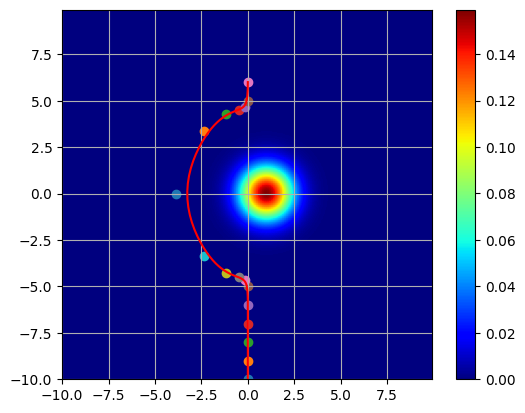

In [19]:
from scipy.optimize import NonlinearConstraint
import scipy.optimize as opt
from scipy.interpolate import BSpline

X_0 = np.array([0, -10, 0, -9, 0, -8, 0, -7, 0, -6, 0, -5, 0, -4, 0, -3, 0, -2, 0, -1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6])

# X_0 = np.array([0, -6, 0, -5, 0, -4, 0, -3, 0, -2, 0, -1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6])
# X_0 = np.array([0, -3])
# sol = opt.minimize(f, X_0, args=(A, x0, y0, sigx, sigy, X_0), constraints=(C3,))
# sol = opt.minimize(f_d, X_0, args=(A, x0, y0, sigx, sigy, X_0), method='SLSQP', 
# bounds=[(-np.inf, np.inf) for i in range(len(X_0))])
# sol = opt.minimize(f_d, X_0, args=(A, x0, y0, sigx, sigy, X_0))
# sol = opt.minimize(f, [1, 1], args=(A, x0, y0, sigx, sigy))
# print(sol)
# Show the function in 2D
plt.imshow(Z, extent=box, origin="lower", cmap='jet')
plt.colorbar()
# And the minimum that we've found:
# print(sol.x)
cp = []
for i in range(0, len(X_0), 2):
    X0 = np.array([X_0[i], X_0[i+1]])
    print("input", X0)
    # print(X0)
    sol = opt.minimize(f_d, X0, args=(A, x0, y0, sigx, sigy, X0))
    plt.scatter(sol.x[0], sol.x[1])
    print("output", sol.x)
    cp.append([sol.x[0], sol.x[1]])
    # print(sol.x)
# plt.scatter(sol.x[0], sol.x[1])
# plt.scatter(sol.x[2], sol.x[3])

from geomdl import BSpline
from geomdl import utilities
from geomdl.visualization import VisMPL

# Create a B-Spline curve
curve = BSpline.Curve()

# Set up the curve
curve.degree = 4
print(cp)
curve.ctrlpts = cp

# Auto-generate knot vector
curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
# Set evaluation delta
curve.delta = 0.01
curvepts = np.array(curve.evalpts)
curveplt, = plt.plot(curvepts[:, 0], curvepts[:, 1], color='red', linestyle='-') 
plt.grid(True)
# plt.legend(loc='best')
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


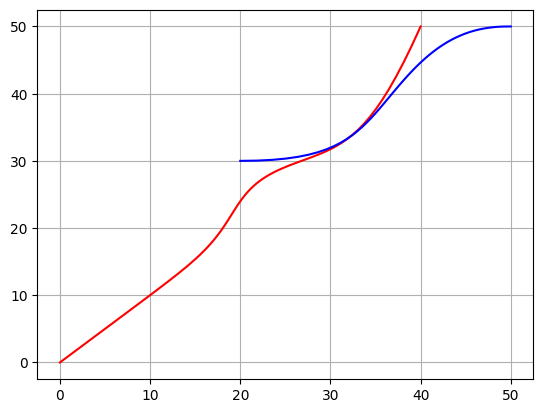

In [20]:
from geomdl import BSpline
from geomdl import utilities
from geomdl.visualization import VisMPL

# Create a B-Spline curve
curve = BSpline.Curve()
curve_1 = BSpline.Curve()
# Set up the curve
curve.degree = 5
curve.ctrlpts = [[0.0, 0.0], [5.0, 5.0], [10.0, 10.0], [15.0, 15.0], [20.0, 20.0], [20.0, 30.0], [30.0, 30.0], [35.0, 35.0], [40.0, 50.0]]

curve_1.degree = 5
curve_1.ctrlpts = [[20.0, 30.0], [30.0, 30.0], [35.0, 35.0], [40.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50.0, 50.0]]

# Auto-generate knot vector
curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
print(curve.knotvector)
curve_1.knotvector = utilities.generate_knot_vector(curve_1.degree, len(curve_1.ctrlpts))
print(curve_1.knotvector)
# Set evaluation delta
curve.delta = 0.01
curve_1.delta = 0.01
# Plot the control point polygon and the evaluated curve
curvepts = np.array(curve.evalpts)
curveplt, = plt.plot(curvepts[:, 0], curvepts[:, 1], color='red', linestyle='-') 
curvepts_1 = np.array(curve_1.evalpts)
curveplt_1, = plt.plot(curvepts_1[:, 0], curvepts_1[:, 1], color='blue', linestyle='-')
plt.grid(True)
# plt.legend(loc='best')
plt.show()

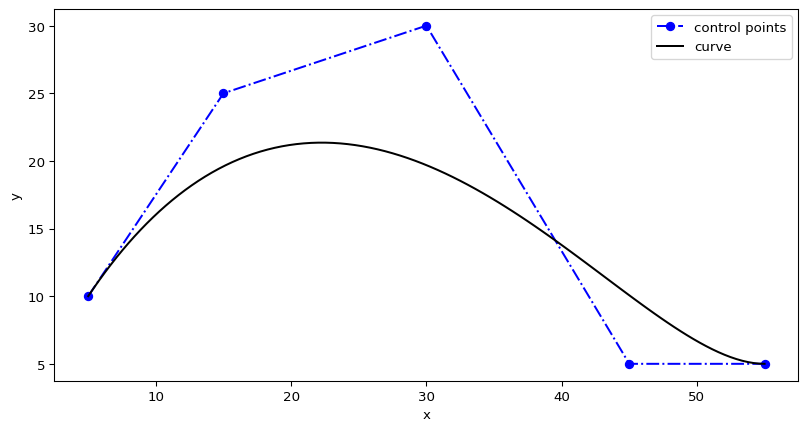

In [21]:
from geomdl import BSpline
from geomdl import utilities
from geomdl.visualization import VisMPL

# Create a B-Spline curve
curve = BSpline.Curve()

# Set up the curve
curve.degree = 4
curve.ctrlpts = [[5.0, 10.0], [15.0, 25.0], [30.0, 30.0], [45.0, 5.0], [55.0, 5.0]]

# Auto-generate knot vector
curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))

# Set evaluation delta
curve.delta = 0.01

# Plot the control point polygon and the evaluated curve
curve.vis = VisMPL.VisCurve2D()
curve.render()